In [1]:
%matplotlib inline
import plot_helpers as ph
from matplotlib import pyplot as plt

In [2]:
fairgp_files = [
    ('../results/parity_tar_adult_2018-09-10/adult_race_numerical-binsensitive.csv', 'Adult (race)'),
    ('../results/parity_tar_adult_2018-09-10/adult_sex_numerical-binsensitive.csv', 'Adult (gender)'),
]
def label_change(label):
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[4] == "True"
    optional_star = "*" if in_True else ""
    with_s = ", use $s$" if in_True else ""
    #return f"FairGPparity{optional_star}", in_True
    #return "average" if mode == "True" else mode, True
    num = label.split('_')[-1]
    return f"$r_t={num}${with_s}", not in_True

fairgp = ph.parse_all(fairgp_files, label_change)
data = fairgp

In [3]:
#data = ph.reorder_entries(data, [0, 1, 2, 3, 4, 5])

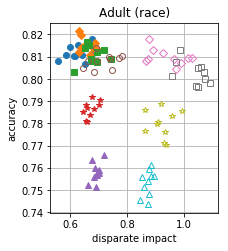

In [26]:
xaxis = ('DIbinary', 'disparate impact')
yaxis = ('accuracy', 'accuracy')
plt.close('all')
fig, plot = plt.subplots(figsize=(3, 3.5))
ph.scatter(plot, data[0], xaxis, yaxis, legend=None)
#plot.set_ylim(0.785, 0.865)
#plot.set_xlim(0.2, 1.5)
fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/dempar_acc_vs_di.eps", dpi=200, bbox_extra_artists=[], bbox_inches='tight')

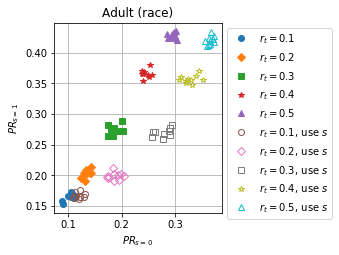

In [29]:
xaxis = ('0-PR-race', '$PR_{s=0}$')
yaxis = ('1-PR-race', '$PR_{s=1}$')
fig, plot = plt.subplots(figsize=(3, 3.5))
legend = ph.scatter(plot, data[0], xaxis, yaxis, legend="outside")
#plot.set_ylim(0.785, 0.865)
#plot.set_xlim(0.2, 1.5)
fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/dempar.eps", dpi=200, bbox_extra_artists=[legend], bbox_inches='tight')

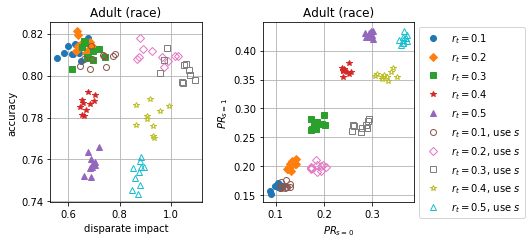

In [31]:
xaxis = ('DIbinary', 'disparate impact')
yaxis = ('accuracy', 'accuracy')
plt.close('all')
fig, plots = plt.subplots(ncols=2, figsize=(6, 3.5))
ph.scatter(plots[0], data[0], xaxis, yaxis, legend=None)
#plot.set_ylim(0.785, 0.865)
#plot.set_xlim(0.2, 1.5)
xaxis = ('0-PR-race', '$PR_{s=0}$')
yaxis = ('1-PR-race', '$PR_{s=1}$')
legend = ph.scatter(plots[1], data[0], xaxis, yaxis, legend="outside")
#plot.set_ylim(0.785, 0.865)
#plot.set_xlim(0.2, 1.5)
fig.tight_layout()
fig.savefig("/its/home/tk324/dev/latex/nips2018_workshop/figures/dempar.eps", dpi=200, bbox_extra_artists=[legend], bbox_inches='tight')